In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns

In [3]:
from utils import load_and_fillna, pca_prep, run_random_forest

In [4]:
from sklearn.model_selection import train_test_split
def extract_features(df):
    features = list(df.columns[:-1])
    y = df['Target']
    X = df[features]
    return X,y

def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
    return X_train, X_test, y_train, y_test

In [10]:
LUAD = pd.read_pickle("data/LUAD.pkl")
LUSC = pd.read_pickle("data/LUSC.pkl")

In [4]:
LUAD.describe()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,11.336484,1.302350,10.451799,9.719074,8.474492,9.834315,11.887912,11.617572,11.192187,10.895522,...,103.204778,103.206485,103.208191,103.209898,103.211604,124.871385,124.145680,103.216724,103.218430,127.319225
std,1.136749,1.768003,0.847498,0.812103,1.113972,1.342715,1.274980,0.850138,1.787712,0.862888,...,2498.323152,2498.364462,2498.405772,2498.447081,2498.488391,2497.633671,2497.704967,2498.612320,2498.653629,2497.697805
min,0.000000,0.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,6.507795,8.942515,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.637094,19.409486,0.000000,0.000000,22.523092
25%,10.607552,0.000000,9.920353,9.164907,7.761551,8.965058,11.121844,11.034627,9.914385,10.291158,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.056559,20.509640,0.000000,0.000000,23.651342
50%,11.361944,1.000000,10.457889,9.733862,8.527477,9.896325,11.954377,11.596654,11.048144,10.858757,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.677380,20.941019,0.000000,0.000000,24.109377
75%,12.077726,2.000000,11.031873,10.248817,9.255601,10.733437,12.660992,12.188432,12.247832,11.517657,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.202139,21.438473,0.000000,0.000000,24.612320
max,13.916906,13.001584,13.199672,12.378024,11.585901,14.084393,16.166575,14.401879,16.792040,14.544180,...,60478.000000,60479.000000,60480.000000,60481.000000,60482.000000,60483.000000,60484.000000,60485.000000,60486.000000,60487.000000


In [3]:
LUAD["Target"] = 1
LUSC["Target"] = 2
df = pd.concat([LUAD,LUSC])

In [15]:
df.std().sort_values()
# threshold = 1000
# newdf = LUAD.drop(LUAD.std()[LUAD.std() < threshold].index.values, axis=1)

Ensembl_ID
Target                   0.499983
ENSG00000000457.12       0.758099
ENSG00000001497.15       0.763801
ENSG00000001167.13       0.791643
ENSG00000001629.8        0.804462
                         ...     
ENSGR0000277120.3     2535.451533
ENSGR0000280767.1     2535.493455
ENSGR0000281849.1     2535.535377
__too_low_aQual       2535.661143
__not_aligned         2535.703066
Length: 60489, dtype: float64

Variance thresholding has no effect as theres no feature with the same value in all columns, therefore no features were removed

In [17]:
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold()
df_variance = thresholder.fit_transform(df)
df_variance.shape

(1137, 60489)

Experimentation with SelectKBest, a feature extraction method to reduce overfitting. The k best features with the highest correlation to the target are selected.

In [23]:
X, y = extract_features(df)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
# feature extraction
X_new = SelectKBest(score_func=f_regression, k=10000).fit_transform(X, y)

In [29]:
X_new.shape
# X.shape

(1137, 10000)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("LR Accuracy: ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Accuracy:  0.9692982456140351


Regularisation doesn't converge

In [ ]:
clf = LogisticRegression(penalty='l1', random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("LR Accuracy: ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
X_train, X_test, y_train, y_test = split_data(X_new, y)
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("LR Accuracy: ", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Accuracy:  0.9605263157894737


In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = split_data(X_new, y)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("SVM Accuracy: ", accuracy_score(y_test, y_pred))


SVM Accuracy:  0.9078947368421053


In [11]:
principalCompLUAD = pca_prep(LUAD, 5)
principalCompLUSC = pca_prep(LUSC, 5)

In [13]:

principalCompLUAD['Target'] = '0'

In [14]:
principalCompLUAD.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001676,-0.000028,-0.001675,-0.001388,-0.000673,-0.000604,-0.000775,-0.000912,-0.000299,-0.000365,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0
PC-2,-0.149663,-0.018969,-0.167814,-0.170663,-0.163008,-0.078096,-0.096229,-0.170478,-0.097126,-0.187566,...,0.000361,0.000361,0.000361,0.000361,0.000324,0.000310,0.000361,0.000361,0.000317,0
PC-3,0.083602,-0.074727,0.093862,-0.004919,0.239022,-0.296755,-0.115605,0.094663,0.200833,0.094013,...,0.000111,0.000111,0.000111,0.000111,0.000109,0.000115,0.000111,0.000111,0.000125,0
PC-4,0.009542,0.113397,-0.038756,0.226396,0.119221,-0.196224,0.008580,-0.212243,-0.017100,0.096655,...,-0.000083,-0.000083,-0.000083,-0.000083,0.000083,-0.000086,-0.000083,-0.000083,-0.000053,0
PC-5,0.037610,-0.147927,-0.033999,0.038899,-0.126607,-0.120663,-0.183692,-0.013738,-0.094451,-0.076787,...,-0.000011,-0.000011,-0.000011,-0.000011,-0.000042,-0.000009,-0.000011,-0.000011,-0.000017,0


In [15]:
principalCompLUSC['Target'] = '1'
lung = pd.concat([principalCompLUAD,principalCompLUSC])

In [16]:
print(lung.shape)
lung.head()

(10, 60489)


Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001676,-0.000028,-0.001675,-0.001388,-0.000673,-0.000604,-0.000775,-0.000912,-0.000299,-0.000365,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0
PC-2,-0.149663,-0.018969,-0.167814,-0.170663,-0.163008,-0.078096,-0.096229,-0.170478,-0.097126,-0.187566,...,0.000361,0.000361,0.000361,0.000361,0.000324,0.000310,0.000361,0.000361,0.000317,0
PC-3,0.083602,-0.074727,0.093862,-0.004919,0.239022,-0.296755,-0.115605,0.094663,0.200833,0.094013,...,0.000111,0.000111,0.000111,0.000111,0.000109,0.000115,0.000111,0.000111,0.000125,0
PC-4,0.009542,0.113397,-0.038756,0.226396,0.119221,-0.196224,0.008580,-0.212243,-0.017100,0.096655,...,-0.000083,-0.000083,-0.000083,-0.000083,0.000083,-0.000086,-0.000083,-0.000083,-0.000053,0
PC-5,0.037610,-0.147927,-0.033999,0.038899,-0.126607,-0.120663,-0.183692,-0.013738,-0.094451,-0.076787,...,-0.000011,-0.000011,-0.000011,-0.000011,-0.000042,-0.000009,-0.000011,-0.000011,-0.000017,0


In [17]:
X, y = extract_features(lung)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [21]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)
print(y_train.index)

Training Features Shape: (8, 60488)
Training Labels Shape: (8,)
Testing Features Shape: (2, 60488)
Testing Labels Shape: (2,)
Index(['PC-4', 'PC-5', 'PC-2', 'PC-1', 'PC-2', 'PC-1', 'PC-3', 'PC-3'], dtype='object')


In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("SVM Accuracy: ", accuracy_score(y_test, y_pred))

SVM Accuracy:  0.0


Training Features Shape: (8, 60488)
Training Labels Shape: (8,)
Testing Features Shape: (2, 60488)
Testing Labels Shape: (2,)
Index(['PC-1', 'PC-1', 'PC-3', 'PC-3', 'PC-5', 'PC-5', 'PC-4', 'PC-2'], dtype='object')
Training the model


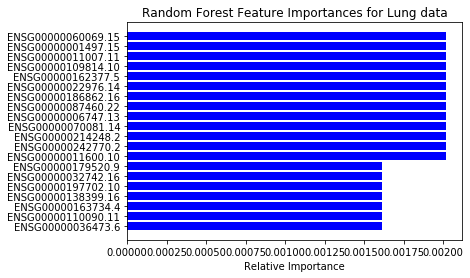

Top 20 features: ['ENSG00000060069.15', 'ENSG00000001497.15', 'ENSG00000011007.11', 'ENSG00000109814.10', 'ENSG00000162377.5', 'ENSG00000022976.14', 'ENSG00000186862.16', 'ENSG00000087460.22', 'ENSG00000006747.13', 'ENSG00000070081.14', 'ENSG00000214248.2', 'ENSG00000242770.2', 'ENSG00000011600.10', 'ENSG00000179520.9', 'ENSG00000032742.16', 'ENSG00000197702.10', 'ENSG00000138399.16', 'ENSG00000163734.4', 'ENSG00000110090.11', 'ENSG00000036473.6']


In [24]:
lung_important = run_random_forest(df=lung, random_state=42, n_estimators=1000, n_importance=20, name="Lung")

In [33]:
lung.shape
lung.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001676,-0.000028,-0.001675,-0.001388,-0.000673,-0.000604,-0.000775,-0.000912,-0.000299,-0.000365,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0
PC-2,-0.149663,-0.018969,-0.167814,-0.170663,-0.163008,-0.078096,-0.096229,-0.170478,-0.097126,-0.187566,...,0.000361,0.000361,0.000361,0.000361,0.000324,0.000310,0.000361,0.000361,0.000317,0
PC-3,0.083602,-0.074727,0.093862,-0.004919,0.239022,-0.296755,-0.115605,0.094663,0.200833,0.094013,...,0.000111,0.000111,0.000111,0.000111,0.000109,0.000115,0.000111,0.000111,0.000125,0
PC-4,0.009542,0.113397,-0.038756,0.226396,0.119221,-0.196224,0.008580,-0.212243,-0.017100,0.096655,...,-0.000083,-0.000083,-0.000083,-0.000083,0.000083,-0.000086,-0.000083,-0.000083,-0.000053,0
PC-5,0.037610,-0.147927,-0.033999,0.038899,-0.126607,-0.120663,-0.183692,-0.013738,-0.094451,-0.076787,...,-0.000011,-0.000011,-0.000011,-0.000011,-0.000042,-0.000009,-0.000011,-0.000011,-0.000017,0


In [34]:
X, y = extract_features(lung)
X_train, X_test, y_train, y_test = split_data(X, y)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [36]:
from sklearn.ensemble import RandomForestClassifier

# randForest = RandomForestClassifier(n_estimators=2000, bootstrap = True, oob_score = True, random_state = 42)
randForest = RandomForestClassifier()
# Train model
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfRandom = RandomizedSearchCV(estimator = randForest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# randForest.fit(Xtrain,Ytrain)
# Fit the random search model
rfRandom.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [37]:
rfRandom.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [39]:
# randForest = RandomForestClassifier(n_estimators=2000, bootstrap = True, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', oob_score = True, random_state = 42)
randForest = RandomForestClassifier(n_estimators=2000, bootstrap = True, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features='auto', oob_score = True, random_state = 42)

randForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(randForest.score(X_train, y_train), 
                                                                                             randForest.oob_score_,
                                                                                             randForest.score(X_test, y_test)))

R^2 Training Score: 0.50 
OOB Score: 0.00 
R^2 Validation Score: 0.50


In [16]:
# df = load_and_fillna("data/TCGA-LUAD.tsv")
# df2 = load_and_fillna("data/TCGA-LUSC.tsv")
# principalCompLUAD = pca_prep(df, 5)
# principalCompLUSC = pca_prep(df2, 5)
# principalCompLUAD['Target'] = '0'
# principalCompLUSC['Target'] = '1'
# # clean up memory
# del df
# del df2
# lung = pd.concat([principalCompLUAD,principalCompLUSC])
# lung_important = run_random_forest(df=lung, random_state=42, n_estimators=1000, n_importance=20, name="Lung")

In [4]:
lung_important

['ENSG00000060069.15',
 'ENSG00000001497.15',
 'ENSG00000011007.11',
 'ENSG00000109814.10',
 'ENSG00000162377.5',
 'ENSG00000022976.14',
 'ENSG00000186862.16',
 'ENSG00000087460.22',
 'ENSG00000006747.13',
 'ENSG00000070081.14',
 'ENSG00000214248.2',
 'ENSG00000242770.2',
 'ENSG00000011600.10',
 'ENSG00000179520.9',
 'ENSG00000032742.16',
 'ENSG00000197702.10',
 'ENSG00000138399.16',
 'ENSG00000163734.4',
 'ENSG00000110090.11',
 'ENSG00000036473.6']

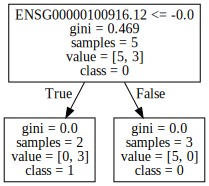

In [34]:
from sklearn import tree
from graphviz import Source
# randForest = RandomForestClassifier(n_estimators=10)
# randForest.fit(Xtrain, Ytrain)
# Extract a tree
estimator = randForest.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
Source(tree.export_graphviz(estimator, out_file=None, 
                feature_names = Xtrain.columns,
                class_names = Ytrain.index,
                rounded = True, proportion = False, 
                precision = 2, filled = True))

# Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')
from IPython.display import SVG
graph = Source( tree.export_graphviz(estimator, out_file=None, feature_names=Xtrain.columns, class_names =['0','1']))
SVG(graph.pipe(format='svg'))

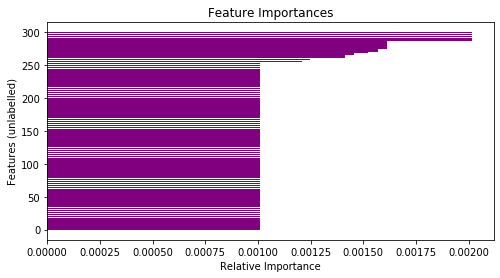

In [46]:
f_importance = randForest.feature_importances_
indices = np.argsort(f_importance)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Feature Importances')
ax.barh(range(len(indices)), f_importance[indices], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('AllFeatsImportance.png')
plt.show()

In [204]:
# import os
# from sklearn.tree import export_graphviz
# import six
# import pydot
# from sklearn import tree
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in randForest.estimators_:
#     export_graphviz(tree_in_forest,out_file='tree.dot',
#     feature_names=Xtrain.columns,
#     filled=True,
#     rounded=True)
#     (graph,) = pydot.graph_from_dot_file('tree.dot')
#     name = 'tree' + str(i_tree)
#     graph.write_png(name+  '.png')
#     os.system('dot -Tpng tree.dot -o tree.png')
#     i_tree +=1

In [56]:
# Use the forest's predict method on the test data
# predictions = rf.predict(testFeatures)
# # Calculate the absolute errors
# errors = abs(predictions - testLabels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [47]:
dfME = load_and_fillna("data/TCGA-MESO-GE.tsv")

In [48]:
principalCompMESO = pca_prep(df, 5)
print(principalCompMESO.nlargest(5, ['PC-1']))
print(principalCompMESO.nlargest(5, ['PC-2']))

                        PC-1      PC-2      PC-3      PC-4      PC-5
Ensembl_ID                                                          
ENSG00000168066.19  0.004068  0.000059  0.000057 -0.000053  0.000073
ENSG00000160199.13  0.004068  0.000058  0.000098  0.000045 -0.000042
ENSG00000182944.16  0.004068  0.000127  0.000119 -0.000025  0.000066
ENSG00000182149.19  0.004068  0.000134  0.000065 -0.000077  0.000067
ENSG00000182473.19  0.004068  0.000104  0.000064 -0.000064 -0.000056
                        PC-1      PC-2      PC-3      PC-4      PC-5
Ensembl_ID                                                          
ENSG00000066405.11  0.004049  0.001057 -0.029748  0.001480  0.002385
ENSG00000080618.12  0.004063  0.000973 -0.012377  0.002179  0.004934
ENSG00000096088.15  0.004063  0.000640 -0.010000  0.004199  0.014664
ENSG00000108576.8   0.004067  0.000604 -0.006543  0.000142 -0.000635
ENSG00000088926.12  0.004065  0.000593 -0.012000  0.002450  0.001999


In [49]:
principalCompMESO = principalCompMESO.T
principalCompMESO['Target'] = '2'
principalCompMESO.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001676,-0.000028,-0.001675,-0.001388,-0.000673,-0.000604,-0.000775,-0.000912,-0.000299,-0.000365,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,2
PC-2,-0.149663,-0.018969,-0.167814,-0.170663,-0.163008,-0.078096,-0.096229,-0.170478,-0.097126,-0.187566,...,0.000361,0.000361,0.000361,0.000361,0.000324,0.000310,0.000361,0.000361,0.000317,2
PC-3,0.083602,-0.074727,0.093861,-0.004919,0.239022,-0.296755,-0.115605,0.094663,0.200833,0.094013,...,0.000111,0.000111,0.000111,0.000111,0.000109,0.000115,0.000111,0.000111,0.000125,2
PC-4,0.009538,0.113392,-0.038760,0.226396,0.119218,-0.196225,0.008582,-0.212247,-0.017110,0.096652,...,-0.000083,-0.000083,-0.000083,-0.000083,0.000083,-0.000086,-0.000083,-0.000083,-0.000053,2
PC-5,0.037594,-0.147929,-0.034021,0.038909,-0.126614,-0.120663,-0.183663,-0.013717,-0.094490,-0.076802,...,-0.000011,-0.000011,-0.000011,-0.000011,-0.000042,-0.000009,-0.000011,-0.000011,-0.000017,2


In [50]:
canComp = pd.concat([principalCompLUAD,principalCompLUSC, principalCompMESO])

In [51]:
canComp.shape

(15, 60489)

In [52]:
feats = list(canComp.columns[:-1])
# labels Y
Y1 = canComp['Target']
X1 = canComp[feats]

In [53]:
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

In [54]:
randFor1 = RandomForestClassifier(n_estimators=1000, random_state = 42)
# Train model
randFor1.fit(Xtrain1,Ytrain1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

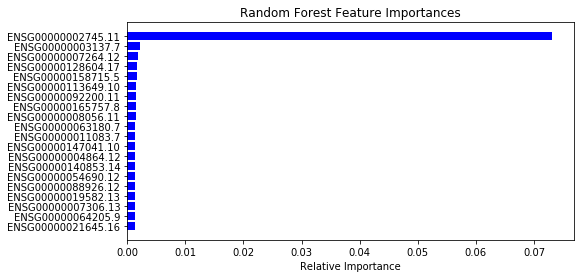

In [55]:
f_import = randFor1.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx1 = np.argsort(f_import)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances')
ax.barh(range(len(sortedIdx1)), f_import[sortedIdx1], color='b', align='center')
plt.yticks(range(len(sortedIdx1)), [feats[i] for i in sortedIdx1])
plt.xlabel('Relative Importance')
plt.savefig('RandForImport2.png')
plt.show()

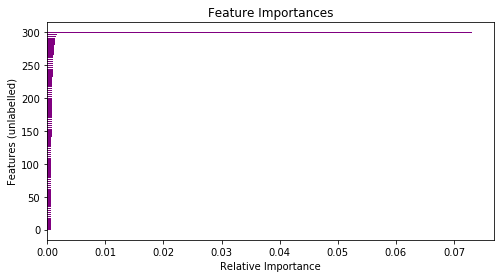

In [56]:
f_import = randFor1.feature_importances_
indices1 = np.argsort(f_import)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Feature Importances')
ax.barh(range(len(indices1)), f_import[indices1], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('AllFeatsImport2.png')
plt.show()